# <img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 07 : K-Nearest Neighbors</font></h1>
<h1 align=center><font size = 4>Hands-On Machine Learning, 1401 | DeadLine: 24th Aban, 13:00 </font></h1>



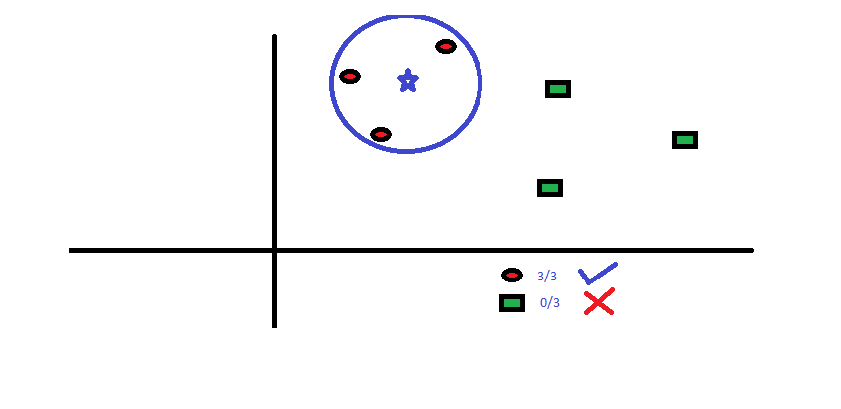

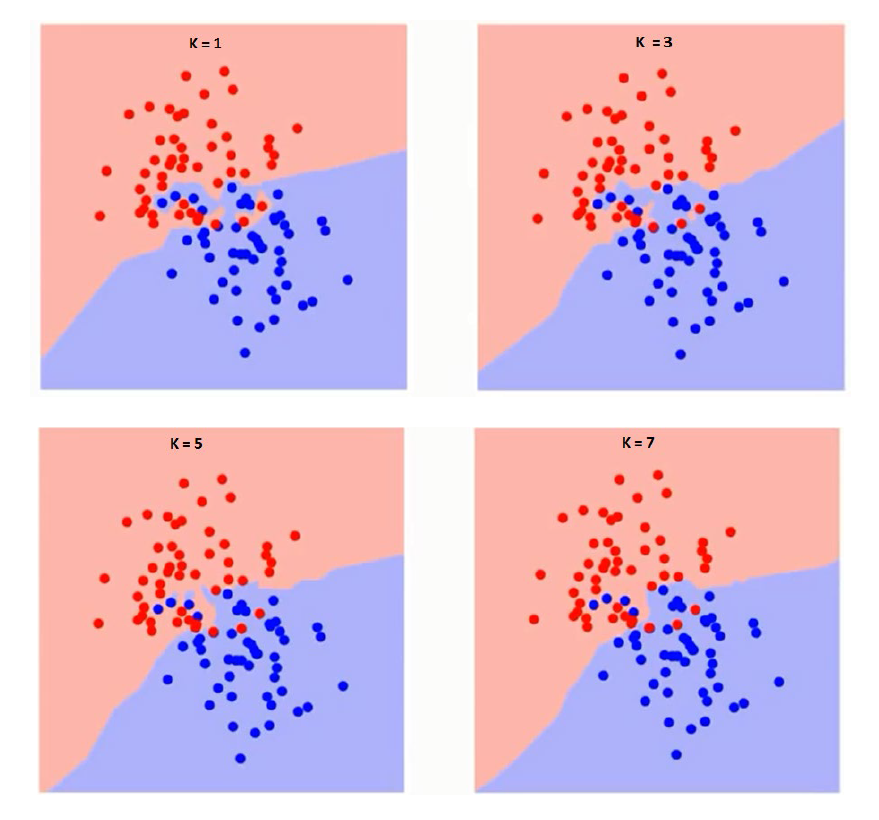

# Step0: Import Libraries

In [84]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from operator import itemgetter
from sklearn.datasets import load_breast_cancer

# Step1: Read Data

In [85]:
df = pd.read_csv('mushrooms.csv')

# Step2: Data Overview

In [11]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [14]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [15]:
df["class"].unique()

array(['p', 'e'], dtype=object)

C:\Users\Marzie_Thr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

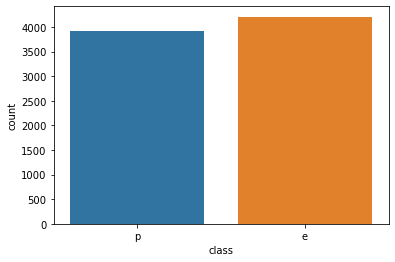

In [16]:
sns.countplot(df['class'])

In [17]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

This dataset is balanced.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.
This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ datatype. From the df.describe() method, we saw that our columns are of ‘object’ datatype. So we will have to change the type to ‘category’ before using this approach.

In [20]:
feature_names = df.columns.to_list()

In [21]:
feature_names

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [22]:
for feature in feature_names:
    print(feature)
    print(df[feature].unique())

class
['p' 'e']
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-surface
['s' 'y' 'f' 'g']
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment
['f' 'a']
gill-spacing
['c' 'w']
gill-size
['n' 'b']
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape
['e' 't']
stalk-root
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring
['s' 'f' 'k' 'y']
stalk-surface-below-ring
['s' 'f' 'y' 'k']
stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type
['p']
veil-color
['w' 'n' 'o' 'y']
ring-number
['o' 't' 'n']
ring-type
['p' 'e' 'l' 'f' 'n']
spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population
['s' 'n' 'a' 'v' 'y' 'c']
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']


* Missing values in the mushroom dataset are identified as ‘?’. Only one variable (stalk-root) appears to contain missing values.
* The column "veil-type" is 0 and not contributing to the data so we remove it.

In [86]:
print('Number of samples: ', df.shape[0])
print('Number of attributes: ', df.shape[1])

value_counts = df['class'].value_counts()
e = value_counts['e']
p = value_counts['p']

print('\nEdible:    ', e)
print('Poisonous: ', p)
print('\nTotal:     ', e + p)

print('\nValues classified as \'Missing\' for stalk-root: ', (df['stalk-root'] == '?').sum())

Number of samples:  8124
Number of attributes:  23

Edible:     4208
Poisonous:  3916

Total:      8124

Values classified as 'Missing' for stalk-root:  2480


In [24]:
df.drop(['stalk-root', 'veil-type'], axis=1, inplace=True)

In [25]:
df = df.astype('category')

In [26]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [27]:
labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [28]:
np.abs(df.corr()['class']).sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
gill-color                  0.530566
bruises                     0.501530
ring-type                   0.411771
gill-spacing                0.348387
stalk-surface-above-ring    0.334593
stalk-surface-below-ring    0.298801
population                  0.298686
habitat                     0.217179
ring-number                 0.214366
cap-surface                 0.178446
spore-print-color           0.171961
stalk-color-above-ring      0.154003
stalk-color-below-ring      0.146730
veil-color                  0.145142
gill-attachment             0.129200
stalk-shape                 0.102019
odor                        0.093552
cap-shape                   0.052951
cap-color                   0.031384
Name: class, dtype: float64

# Step3: X, y

In [29]:
X = df.drop('class', axis=1)
y = df['class']

# Step4: Split the Data to Train & Test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Step5: Scaling the Features

# Step6: KNN

## Creat the Model

In [31]:
def KNN_model(X_train, y_train, n_neighbors=3):
    
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    
    return knn_model

## Train the Model

In [32]:
knn_model = KNN_model(X_train, y_train, n_neighbors=3)

##  Prediction & Evaluation
<hr>
print classification report

In [33]:
def model_evaluation(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    display(pd.DataFrame({'Y_Test':y_test, 'Y_Pred':y_pred}))
    accuracy = accuracy_score(y_test, y_pred)
    print('\nclassification_report:\n\n', classification_report(y_test, y_pred))
    return accuracy

In [34]:
accuracy = model_evaluation(knn_model, X_test, y_test)

,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [35]:
accuracy

0.9981538461538462

# Step7: Elbow Method for Choosing Reasonable K Values

In [36]:
#Test List of Error per k
test_error_list = []

for k in range(1, 30):
    
    # Train the model
    knn_model = KNN_model(X_train, y_train, n_neighbors=k)
    
    # Evaluating the Model
    knn_accuracy = model_evaluation(knn_model, X_test, y_test)
    
    # Error of Test Set
    test_error = 1 - knn_accuracy
    
    # Append the Error to the Test List
    test_error_list.append(test_error)

,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99       843
           1       0.99      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       843
           1       0.99      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       843
           1       0.99      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       843
           1       0.99      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       843
           1       0.99      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       843
           1       0.99      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       843
           1       0.99      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       843
           1       0.99      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       843
           1       0.99      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.99       843
           1       0.99      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       843
           1       0.99      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       843
           1       0.99      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.99       843
           1       0.99      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.99       843
           1       0.99      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.99       843
           1       0.99      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       843
           1       0.99      0.97      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       843
           1       0.99      0.97      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       843
           1       0.99      0.96      0.97       782

    accuracy                           0.97      1625
   macro avg       0.98      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       843
           1       0.99      0.96      0.97       782

    accuracy                           0.97      1625
   macro avg       0.98      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       843
           1       0.99      0.95      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.96      0.99      0.97       843
           1       0.99      0.95      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       843
           1       0.99      0.95      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       843
           1       0.99      0.95      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



**PLOT**

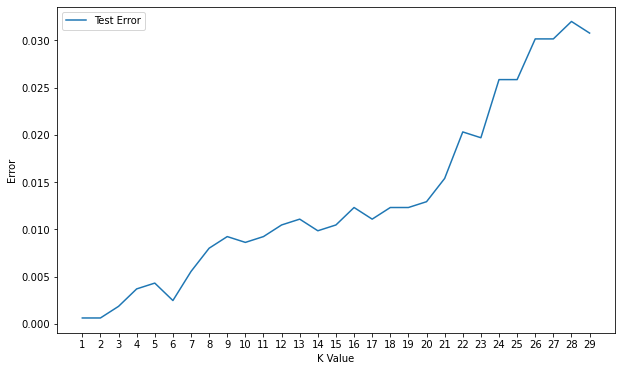

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), test_error_list, label='Test Error')
plt.legend()
plt.ylabel('Error')
plt.xlabel('K Value')
plt.xticks(range(1, 30))
plt.show()

# Step8: Creating a Pipeline to find K value

In [38]:
knn_pipe = Pipeline([('knn', KNeighborsClassifier())])

In [39]:
k_values = list(range(1, 30))

In [40]:
param_grid = {'knn__n_neighbors':k_values}

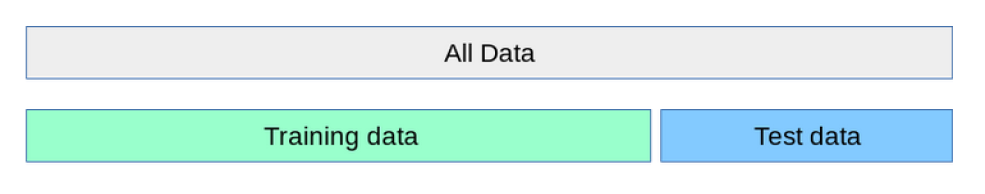

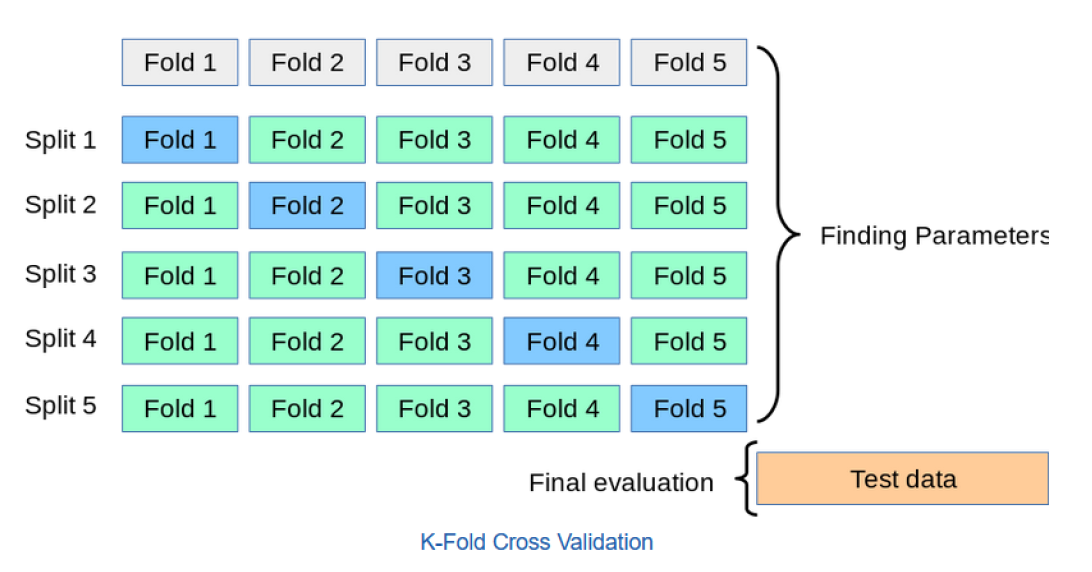

In [42]:
knn_grid = GridSearchCV(knn_pipe, param_grid, cv=5, scoring='accuracy')

In [43]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [44]:
knn_grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'knn': KNeighborsClassifier(n_neighbors=1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

## 🟣 Fit model with the best K value

In [45]:
# Result of 'Elbow' method
final_pipe = Pipeline([('knn', KNeighborsClassifier(n_neighbors=3))]) 

In [46]:
final_pipe.fit(X, y)

Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))])

In [47]:
model_evaluation(final_pipe, X_test, y_test)

,Y_Test,Y_Pred
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1



classification_report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



0.9981538461538462

# Challenge

In [88]:
df = load_breast_cancer()

In [61]:
data = df.data

In [62]:
target = df.target

In [63]:
data.shape

(569, 30)

In [64]:
target.shape

(569,)

In [65]:
set(target)

{0, 1}

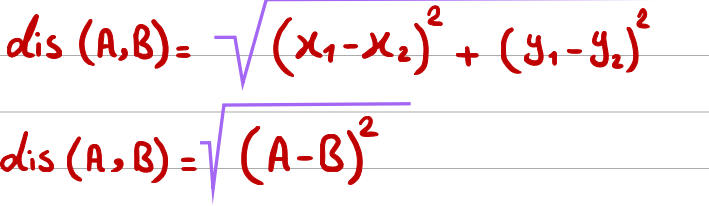

In [66]:
def Euclidean(x, y):
    distance = np.sqrt(np.sum((x - y) ** 2))
    return distance

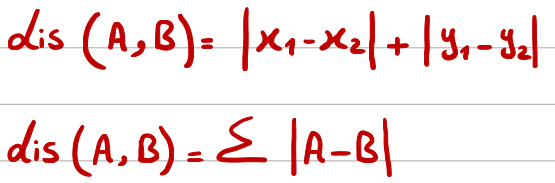

In [67]:
def Manhattan(x, y):
    distance = np.sum(np.abs(x - y))
    return distance

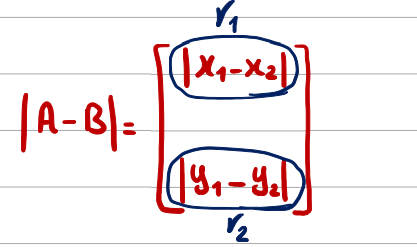
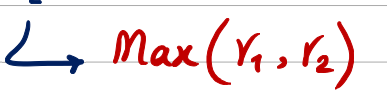

In [68]:
def Chebychev(x, y):
    distance = np.max(np.abs(x - y))
    return distance

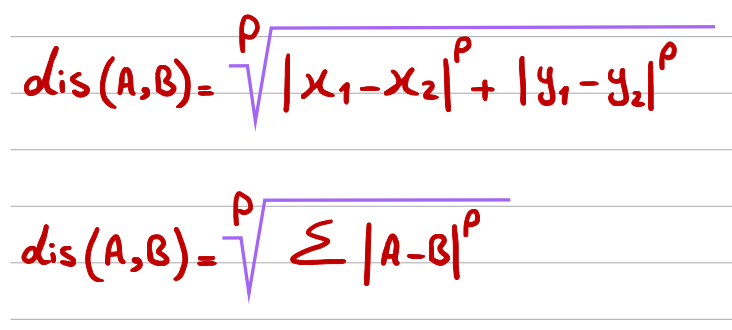

In [69]:
def Minkowski(x, y, p=2):
    distance = np.power((np.sum(np.abs(x - y) ** p)), (1./p))
    return distance  

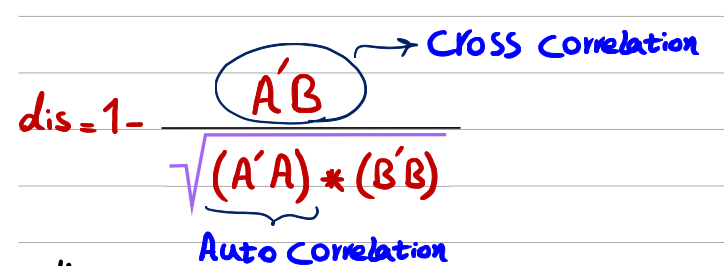

In [70]:
def Cosine(x, y):
    corr = (np.dot(x, y)) / (np.linalg.norm(x) * np.linalg.norm(y))
    return 1 - corr  

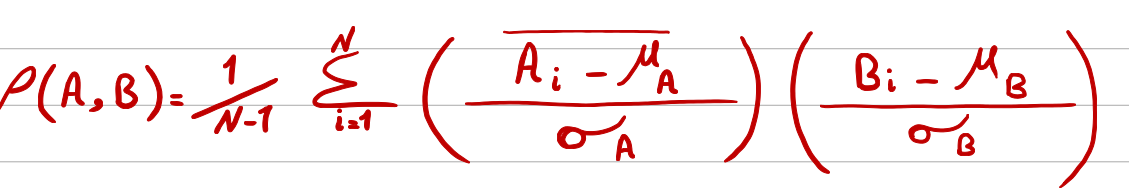
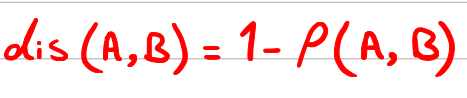

In [71]:
def Correlation(x, y):
    N = len(x)
    u_x = x.mean()
    u_y = y.mean()
    
    sigma_x = x.std()    
    sigma_y = y.std()
    
    corr = (1 / (N - 1)) * sum(((x - u_x) / sigma_x) * ((y - u_y) / sigma_y))
    distance = 1 - corr
    
    return distance

In [72]:
a = X_test.iloc[0]
b = X_test.iloc[1]

1.   Calculate distance between x and each train data in X_train by desired distance method and put them in distances list.
2.   Sort distances list descending with their indexes.
3.   Choose the first k items of indexes and find labels of this indexes.
4.   Count numbers of labels 0 and labels 1.
5.  *   Numbers of labes 1 > Numbers of labes 0 --> x is labeled to 1 
    *   Numbers of labes 0 > Numbers of labes 1 --> x is labeled to 0
    *   Else it's labeled None because there is ambiguity in decision.

In [73]:
def KNN_model(x, k, X_train, y_train, distance_method='Euclidean', p=2):
    
    from operator import itemgetter
    distances = []
    
    
    for row in range(X_train.shape[0]):

        if distance_method == 'Euclidean':
            distance = Euclidean(x, X_train[row])

        elif distance_method == 'Manhattan':
            distance = Manhattan(x, X_train[row])

        elif distance_method == 'Chebychev':
            distance = Chebychev(x, X_train[row])

        elif distance_method == 'Minkowski':
            distance = Minkowski(x, X_train[row], p)

        elif distance_method == 'Cosine':
            distance = Cosine(x, X_train[row])

        elif distance_method == 'Correlation':
            distance = Correlation(x, X_train[row])

        distances.append(distance)


    # key=itemgetter(1) --> 
    # You sort a two-dimensional list according to the value of any position (index).
    indexes, distances_sorted = zip(*sorted(enumerate(distances), key=itemgetter(1), reverse=False))
    distances_sorted = list(distances_sorted)
    indexes = list(indexes)

    k_NN = distances_sorted[:k]
    k_NN_indexes = indexes[:k]

    k_NN_label = y_train[k_NN_indexes]
    label_0 = k_NN_label[k_NN_label == 0]
    label_1 = k_NN_label[k_NN_label == 1]

    if len(label_1) > len(label_0):
        label = 1
    elif len(label_0) > len(label_1):
        label = 0
    else:
        label = np.nan

    return label

In [74]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42) 

In [75]:
y_pred = []
for row in range(X_test.shape[0]):
    y_pred.append(KNN_model(X_test[row], 3, X_train, y_train, distance_method='Euclidean', p=2))

In [76]:
pd.DataFrame({'Y_Test':y_test, 'Y_Pred':y_pred})

,Y_Test,Y_Pred
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
109,1,1
110,0,0
111,1,1
112,1,1


In [77]:
error = []

for k in range(1, 40):
    y_pred = []
    for row in range(X_test.shape[0]):
        y_pred.append(KNN_model(X_test[row], k, X_train, y_train, distance_method='Euclidean', p=2))
    error.append(np.mean(y_pred != y_test))

In [78]:
len(error)

39

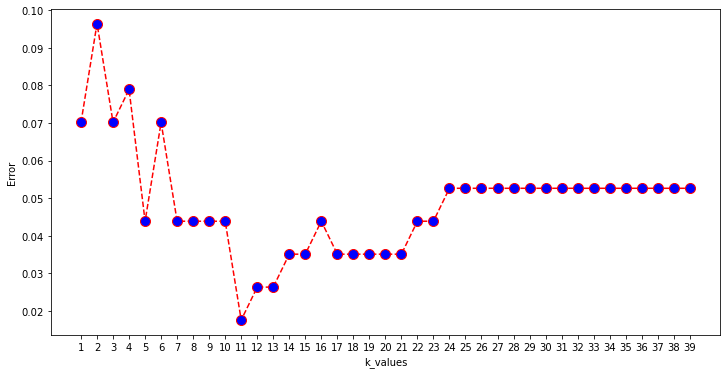

In [79]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 40), error, color='red', linestyle='dashed',
        marker='o', markerfacecolor='blue', markersize=10)

plt.xticks(np.arange(1, 40))
plt.xlabel('k_values')
plt.ylabel('Error')
plt.show()

In [80]:
k = 11
error = []
distance_methods = ['Euclidean', 'Manhattan', 'Chebychev', 'Minkowski', 'Cosine', 'Correlation']

for distance_method in distance_methods:
    y_pred = []
    for row in range(X_test.shape[0]):
        y_pred.append(KNN_model(X_test[row], k, X_train, y_train, distance_method=distance_method))
    error.append(np.mean(y_pred != y_test))

In [81]:
for e, dis in zip(error, distance_methods):
    print(dis, ':', e)

Euclidean : 0.017543859649122806
Manhattan : 0.03508771929824561
Chebychev : 0.02631578947368421
Minkowski : 0.017543859649122806
Cosine : 0.05263157894736842
Correlation : 0.06140350877192982


<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Well done!</h1>
  <p>Best Wishes!, Filoger</p>
</div>